In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## Objectives

1. Examine publication rate of onepager after onboarding process (1/14)
2. Examine bounce rate and stats column 
3. Examine metrics card effectiveness on predicting user/founder activity on onepager

## Our Data

In [18]:
opv_master = pd.read_csv("data/onepager_visitor_master_stats.csv")
user_master = pd.read_csv("data/user_master.csv")
onepager = pd.read_csv("data/Week 1/onepagers.csv")
op_analytics = pd.read_csv("data/Week 1/onepager_analytics.csv")
founders = pd.read_csv("data/Week 1/founders.csv")
user_op = pd.read_csv("data/Week 1/user_onepagers.csv")
visitors = pd.read_csv("data/Week 1/visitors.csv")

In [3]:
#joined onepager_visitor_stats.csv and onepager_visitors.csv
#examine what each visitor did on onepager (stats column)
opv_master.head()
#opv_master.columns

,Unnamed: 0,uuid_x,onepager_uuid_x,visitor_uuid_x,onepager_visitor_uuid,type,value,created_at_x,updated_at_x,onepager_visitor_id,...,onepager_uuid_y,visitor_uuid_y,access_status,stats,created_at_y,updated_at_y,show_email_to_onepager_creators,invited_via_investor_invite_tool,created_at,updated_at
0,0,00014bef-5615-4541-9523-51531dcd64e6,3684efe9-ac9b-4742-a5ac-79de01bd78b7,e81727ce-b15f-4bde-95ac-ac6535564d5d,92bcd248-394c-479c-a0ad-94f7b2734740,onepager.loaded,3684efe9-ac9b-4742-a5ac-79de01bd78b7,2020-09-17 21:28:57,2020-09-17 21:28:57,3684efe9-ac9b-4742-a5ac-79de01bd78b7e81727ce-b...,...,3684efe9-ac9b-4742-a5ac-79de01bd78b7,e81727ce-b15f-4bde-95ac-ac6535564d5d,granted,"{""opened"": true, ""pitch_deck"": {""pages_viewed""...",2020-09-16 17:43:37,2020-12-19 18:17:00,1.0,0.0,NaN,NaN
1,1,008e2fe0-3d54-48be-a91f-e7d0cfcfe742,3684efe9-ac9b-4742-a5ac-79de01bd78b7,e81727ce-b15f-4bde-95ac-ac6535564d5d,92bcd248-394c-479c-a0ad-94f7b2734740,onepager.loaded,3684efe9-ac9b-4742-a5ac-79de01bd78b7,2020-12-19 18:16:51,2020-12-19 18:16:51,3684efe9-ac9b-4742-a5ac-79de01bd78b7e81727ce-b...,...,3684efe9-ac9b-4742-a5ac-79de01bd78b7,e81727ce-b15f-4bde-95ac-ac6535564d5d,granted,"{""opened"": true, ""pitch_deck"": {""pages_viewed""...",2020-09-16 17:43:37,2020-12-19 18:17:00,1.0,0.0,NaN,NaN
2,2,044be578-d827-4ad3-910e-2d58767899e4,3684efe9-ac9b-4742-a5ac-79de01bd78b7,e81727ce-b15f-4bde-95ac-ac6535564d5d,92bcd248-394c-479c-a0ad-94f7b2734740,onepager.loaded,3684efe9-ac9b-4742-a5ac-79de01bd78b7,2020-12-19 18:13:52,2020-12-19 18:13:52,3684efe9-ac9b-4742-a5ac-79de01bd78b7e81727ce-b...,...,3684efe9-ac9b-4742-a5ac-79de01bd78b7,e81727ce-b15f-4bde-95ac-ac6535564d5d,granted,"{""opened"": true, ""pitch_deck"": {""pages_viewed""...",2020-09-16 17:43:37,2020-12-19 18:17:00,1.0,0.0,NaN,NaN
3,3,0909ef26-ad4b-489b-be2e-65586ab9a842,3684efe9-ac9b-4742-a5ac-79de01bd78b7,e81727ce-b15f-4bde-95ac-ac6535564d5d,92bcd248-394c-479c-a0ad-94f7b2734740,onepager.loaded,3684efe9-ac9b-4742-a5ac-79de01bd78b7,2020-09-19 15:46:24,2020-09-19 15:46:24,3684efe9-ac9b-4742-a5ac-79de01bd78b7e81727ce-b...,...,3684efe9-ac9b-4742-a5ac-79de01bd78b7,e81727ce-b15f-4bde-95ac-ac6535564d5d,granted,"{""opened"": true, ""pitch_deck"": {""pages_viewed""...",2020-09-16 17:43:37,2020-12-19 18:17:00,1.0,0.0,NaN,NaN
4,4,0a14d615-70d5-4394-8f54-7c75c72f48bc,3684efe9-ac9b-4742-a5ac-79de01bd78b7,e81727ce-b15f-4bde-95ac-ac6535564d5d,92bcd248-394c-479c-a0ad-94f7b2734740,onepager.loaded,3684efe9-ac9b-4742-a5ac-79de01bd78b7,2020-09-17 21:01:24,2020-09-17 21:01:24,3684efe9-ac9b-4742-a5ac-79de01bd78b7e81727ce-b...,...,3684efe9-ac9b-4742-a5ac-79de01bd78b7,e81727ce-b15f-4bde-95ac-ac6535564d5d,granted,"{""opened"": true, ""pitch_deck"": {""pages_viewed""...",2020-09-16 17:43:37,2020-12-19 18:17:00,1.0,0.0,NaN,NaN


In [4]:
#joined users.csv and user_preferences.csv 
user_master.head()

,Unnamed: 0,uuid,send_view_notification_email,new_viewer_notification_email,new_access_request_notification_email,reminders_notification_email,created_at_x,updated_at_x,name,email_verification_code,email_verification_code_valid_until,is_email_verified,image_key,created_at_y,updated_at_y,created_at,updated_at
0,0,0025d0a1-ed0b-4a4f-aedb-b5d67331ed2a,1,1,1,1,2020-10-15 23:03:44,2020-10-15 23:03:44,Christian Blake,NaN,NaN,0,NaN,2020-10-15 23:03:44,2020-10-15 23:03:44,2020-10-15 23:03:44,2020-10-15 23:03:44
1,1,00359c09-51b2-4584-9c32-2b9e98fcb981,1,1,1,1,2020-11-12 00:50:20,2020-11-12 00:50:20,Vincent Song,NaN,NaN,0,NaN,2020-11-12 00:50:20,2020-11-12 00:50:20,2020-11-12 00:50:20,2020-11-12 00:50:20
2,2,006a1d2b-720d-48a3-b348-717e1f45286f,1,1,1,1,2020-08-25 08:02:41,2020-08-25 08:02:41,Sai Krishna,NaN,NaN,0,NaN,2020-08-25 08:02:41,2020-08-25 08:04:42,2020-08-25 08:02:41,2020-08-25 08:04:42
3,3,00bb36fe-71e7-46f7-8025-1c64f2845b0f,1,1,1,1,2020-08-13 22:56:34,2020-08-13 22:56:34,Corby Pryor,NaN,NaN,0,NaN,2020-08-13 22:56:34,2020-09-09 14:16:26,2020-08-13 22:56:34,2020-09-09 14:16:26
4,4,00c5d6c5-22a0-4c3c-aff0-13f4ff672c92,1,1,1,1,2020-10-04 18:27:02,2020-10-04 18:27:02,Gaetano Gargiulo,NaN,NaN,0,NaN,2020-10-04 18:27:02,2020-10-04 18:27:02,2020-10-04 18:27:02,2020-10-04 18:27:02


In [5]:
#mapping between onepager id and founder id 
user_op.head()

,user_uuid,onepager_uuid,created_at,updated_at
0,0025d0a1-ed0b-4a4f-aedb-b5d67331ed2a,3492a5de-571c-48ca-ab32-892add34aa96,2020-10-15 23:06:12,2020-10-15 23:06:12
1,006a1d2b-720d-48a3-b348-717e1f45286f,d7e6760c-20b0-4c61-8566-3e55f5924d8e,2020-08-25 08:04:04,2020-08-25 08:04:04
2,00bb36fe-71e7-46f7-8025-1c64f2845b0f,5d2f09ce-272c-47ab-8515-9e88d19b17cb,2020-08-13 23:02:57,2020-08-13 23:02:57
3,00c5d6c5-22a0-4c3c-aff0-13f4ff672c92,f925bf20-fff1-4fbc-9822-533fd929928a,2020-10-04 18:27:38,2020-10-04 18:27:38
4,00df81b2-0408-482f-a259-6179d123e2c1,214db4e4-f117-46af-beac-09ee69d4edd9,2021-02-06 23:29:38,2021-02-06 23:29:38


In [6]:
#id and title of each visitor 
visitors.head()

,uuid,title,created_at,updated_at
0,0013c429-82a8-49f4-accd-14078fc0d506,MD,2020-11-04 16:48:18,2021-02-18 20:18:08
1,00476bfb-46ec-4f0e-98d0-2bce1fcca1d2,VC,2020-09-09 21:10:16,2021-01-09 06:03:55
2,006092bb-28f3-43da-a959-3debd001b4ed,NaN,2020-10-29 21:06:09,2020-10-29 21:06:09
3,006d8226-a86b-44b0-9a79-ab35d08ee045,VC,2021-01-10 04:49:43,2021-01-10 04:49:43
4,00770d2f-8ff9-430a-893a-64a903576366,NaN,2020-12-18 13:47:25,2020-12-21 01:02:22


In [7]:
#Information on each onepager 
onepager.head()

,uuid,image_key,company_name,location,description,short_description,slug,links,published_versions,pdf_filename,pdf_key,pdf_total_pages,video_url,video_total_duration_in_seconds,view_setting,created_at,updated_at,investor_contact_limit_per_week,color,status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,access_list_only,2021-01-18 15:34:46,2021-01-18 15:34:46,15,NaN,active
1,00d06d10-e347-494c-9838-6a88a5bee9f5,NaN,FiVana,"Boston, MA, USA",NaN,Financial system for people in their early 20s,NaN,{},[],NaN,NaN,NaN,NaN,NaN,access_list_only,2020-12-01 18:22:26,2020-12-01 18:22:26,15,NaN,active
2,013bc984-e2b6-4d99-8604-95fdd2f61096,b5faca3d-1b5d-4a2e-9144-a0c2944ddac8,Sixfab,"San Jose, CA, USA","We manage Linux, Carrier, SIM, Cellular Modem ...",Uninterrupted Cellular Connectivity for Linux ...,NaN,"{""web_url"": ""https://sixfab.com/"", ""demo_link""...",[],Sixfab_2020_August.pdf,1a3ed4d6-cdb5-443f-9f1d-38f082d04c88,13.0,https://www.youtube.com/watch?v=x83qCrfOGLc&fe...,49.0,access_list_only,2020-09-11 08:34:47,2020-09-12 21:36:58,15,NaN,active
3,01581595-74ce-4b78-99dd-26b0af195c79,34385840-e623-4107-85e0-57d05c1bba11,Riley Noon,"San Francisco Bay Area, CA, USA","Riley Noon does not actually have a company, b...",A man creating a virtual reality out of thin air.,riley-noon,"{""socials"": {}, ""web_url"": """", ""demo_link"": """"}","[{""content"": {""faqs"": [], ""raises"": [{""note"": ...",NaN,NaN,NaN,NaN,NaN,anyone_with_link,2021-02-06 23:23:33,2021-02-06 23:40:19,15,{},active
4,01ac3f85-0549-4cde-b57c-8ba7ba62c006,NaN,Ice Giant Ice-Cream Oy,"Turku, Suomi",Company produces and sells alcohol ice-cream w...,Tasteful alcohol ice-cream,icegiant,"{""web_url"": ""www.icegiant.fi"", ""demo_link"": """"}","[{""content"": {""faqs"": [], ""raises"": [{""note"": ...",Ice Giant Pitch Deck PPT.pdf,237bab1e-2585-489e-81b2-4f772ee8c8d2,11.0,NaN,NaN,anyone_with_link,2020-09-22 05:58:14,2020-09-22 06:10:20,15,NaN,active


In [8]:
# stats on each onepager 
op_analytics.head()

,uuid,onepager_uuid,fetch_date,total_views,unique_views,bounce_rate,created_at,updated_at
0,00028bff-80cb-4116-9603-a59bb6b1edf8,c4dcf7f9-e88a-4738-94c0-a203e6101df0,2020-11-13 00:00:00,4,3,0.0,2020-11-13 08:52:56,2021-01-18 09:27:07
1,00028dd5-75ff-4d9a-bc3d-6f53e1ac6ed9,fda32462-2923-4965-88b6-9cb5394f4225,2020-11-20 00:00:00,0,0,0.0,2020-11-20 10:55:05,2021-01-01 12:55:44
2,0004b827-0fda-4459-97b1-3fc61ff29d54,77690cf9-3292-4424-a1db-5e9f229f8af6,2020-11-04 00:00:00,0,0,0.0,2020-11-04 08:52:35,2021-01-29 09:25:35
3,00071abc-574f-4668-893a-2ea59659df20,4bdc2ea5-3752-4bc5-a92d-0141f60e0c67,2021-01-31 00:00:00,0,0,0.0,2021-01-31 08:52:55,2021-02-19 09:21:49
4,000761cc-2adb-4304-9024-09914df4df59,6ad89d78-895f-4011-bdb2-6f2b84fdda06,2020-12-19 00:00:00,0,0,0.0,2020-12-19 08:52:57,2021-02-19 10:52:35


In [9]:
#founders data. can join uuid on other tables
founders.head()

,uuid,image_key,name,title,links,bio,created_at,updated_at
0,0011279a-0c95-4f3d-8ae0-a0916fe54afd,8ea8552e-0588-4c8c-b2ff-30ba76349136,Will Valori,Founder,"{""linkedin"": ""https://www.linkedin.com/in/will...","Strategy at BCG, early childhood education at ...",2020-08-17 19:29:54,2020-10-27 15:51:19
1,0014bb20-d843-42f5-8af4-d30de649e1f9,186f81e4-762b-4e6a-b0a5-5bb454e74410,Saad Usmani,Founder & CEO,"{""linkedin"": ""https://www.linkedin.com/in/saad...","Currently, 23, I've founded AirwaysX with an a...",2020-09-17 16:04:17,2020-10-21 15:11:40
2,004a3eee-e647-4495-bc42-a7e588acb32d,a39ea233-6d97-4d79-b044-86e5e009d453,Mat Sherman,Founder,"{""twitter"": ""http://twitter.com/mat_Sherman/""}","Mat is the founder of FWD. Before FWD, Mat ran...",2020-12-23 17:33:15,2020-12-23 23:08:13
3,004d7015-53dd-4f0d-81f6-a33e53ee537c,6a35784c-565d-466b-b46a-8d8fbd231e7f,Laura Robbins,COO & Co-Founder,"{""linkedin"": ""https://www.linkedin.com/in/laur...",Ms. Robbins is the COO of Advocatia. Ms. Robbi...,2020-12-17 20:45:24,2021-01-10 00:15:43
4,00551a38-1494-464d-9e2e-9592ac704a1a,NaN,Mike Gillan,CTO & Co-Founder,"{""linkedin"": ""https://www.linkedin.com/in/mike...","Mike is a security architect, leader, entrepre...",2020-09-28 11:36:27,2020-09-28 11:36:27


## Data Cleaning / EDA

### 1. Examine publication rate of onepager after onboarding process (1/14)

In [10]:
op_cleaned = onepager.dropna(subset = ["uuid", "company_name"])
op_cleaned = op_cleaned[["uuid", "company_name","description", "links", "created_at"]]
op_cleaned = op_cleaned.rename(columns = {"company_name": "company name", "created_at": "date created"})
op_cleaned = op_cleaned.sort_values("date created", ascending = False)
op_cleaned["date created"] = op_cleaned["date created"].str.extract(r'(\d{4}-\d{2}-\d{2})')
op_cleaned.head()

,uuid,company name,description,links,date created
1036,d24017c9-ab69-41df-a8e2-2a5e8b29306f,AuctionVilla OÜ,AuctionVilla.IO is an A.I. Driven SaaS Digital...,"{""socials"": {""twitter"": ""https://twitter.com/a...",2021-02-19
12,0384e6c6-2fea-41b1-933c-acb0c4e37d9a,Unicorner,We help people find the coolest up-and-coming ...,"{""socials"": {""twitter"": ""twitter.com/Unicorner...",2021-02-19
168,24997b2b-7d90-495f-9ede-0fe93813a015,AllSpice,A git platform made for hardware. \n\nAllSpice...,"{""socials"": {}, ""web_url"": ""https://www.allspi...",2021-02-18
978,c924634f-5d7b-4a85-9f5b-8479772eb956,Dunyha,We empower real estate ownership serving trave...,"{""socials"": {}, ""web_url"": ""dunyha.com"", ""demo...",2021-02-18
1009,cdb80c01-1817-4e9e-9618-792a9ae0aee7,Sample I3 Onepager,"In a few words, say what your company is about.",{},2021-02-18


In [11]:
#sub-dataframes: before and after introduction of onboarding form
before_1_14 = op_cleaned.loc[463:] 
after_1_14 = op_cleaned.loc[:462]

#monthly publication after 1/14
feb_2021 = after_1_14[after_1_14["date created"].str.contains(r'(\d{4}-02-\d{2})')].shape[0]
jan_2021_a = after_1_14[after_1_14["date created"].str.contains(r'(\d{4}-01-\d{2})')].shape[0]

#monthly publication before 1/14
july_2020 = before_1_14[before_1_14["date created"].str.contains(r'(\d{4}-07-\d{2})')].shape[0]
aug_2020 = before_1_14[before_1_14["date created"].str.contains(r'(\d{4}-08-\d{2})')].shape[0]
sep_2020 = before_1_14[before_1_14["date created"].str.contains(r'(\d{4}-09-\d{2})')].shape[0]
oct_2020 = before_1_14[before_1_14["date created"].str.contains(r'(\d{4}-10-\d{2})')].shape[0]
nov_2020 = before_1_14[before_1_14["date created"].str.contains(r'(\d{4}-11-\d{2})')].shape[0]
dec_2020 = before_1_14[before_1_14["date created"].str.contains(r'(\d{4}-12-\d{2})')].shape[0]
jan_2021_b = before_1_14[before_1_14["date created"].str.contains(r'(\d{4}-01-\d{2})')].shape[0]

/opt/conda/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


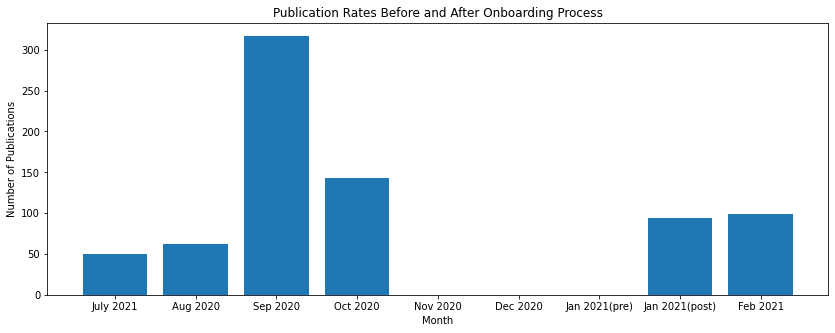

In [12]:
months = ['July 2021', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020', 'Jan 2021(pre)', 
         'Jan 2021(post)', 'Feb 2021']
monthly_publ = [july_2020, aug_2020, sep_2020, oct_2020, nov_2020, dec_2020, jan_2021_b, jan_2021_a, feb_2021]

plt.figure(figsize=(14, 5))
plt.bar(months, monthly_publ)
plt.title("Publication Rates Before and After Onboarding Process")
plt.xlabel("Month")
plt.ylabel("Number of Publications")
plt.show()

### 2. Examine bounce rate 

Did not bounce:  54624
Likely to/already bounced:  2587


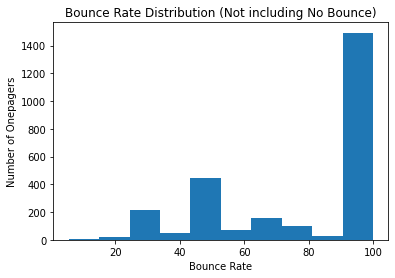

In [13]:
bounce = op_analytics.sort_values("bounce_rate", ascending = False)
bounce = bounce[["uuid", "onepager_uuid", "total_views", "bounce_rate"]]

y_bounce = bounce[bounce["bounce_rate"] > 0.0]
n_bounce = bounce[bounce["bounce_rate"] == 0.0]

plt.hist(y_bounce["bounce_rate"])
plt.title("Bounce Rate Distribution (Not including No Bounce)")
plt.xlabel("Bounce Rate")
plt.ylabel("Number of Onepagers")

print("Did not bounce: ", n_bounce.shape[0])
print("Likely to/already bounced: ", y_bounce.shape[0])

In [14]:
# Looking deeper into onepagers with higher bounce rates 
y_bounce.head()

,uuid,onepager_uuid,total_views,bounce_rate
35915,a018f98c-0ed2-41a3-912a-a1aac21b02d8,c1585d86-a875-480e-b14d-883cd43635dd,1,100.0
23190,677646d3-6b3d-4b69-9c68-64449b425d77,264b8b4d-d000-428f-805e-48407ab3d49f,4,100.0
44477,c657217f-0cd0-480d-8740-14a497f3f300,b7b27f11-0154-4093-b39f-7a1e7d6814ac,1,100.0
23176,676d7dd9-092c-4415-85ba-85e5cfb278a8,267af659-c847-4c89-8bc1-bb4a8aa966a7,1,100.0
23178,676eb381-aa3f-4f55-9fa3-76422bc48835,9dfc8ca8-9931-4cb6-a963-6cf893919208,2,100.0


In [15]:
y_bounce = y_bounce.drop(columns = "uuid")
y_bounce = y_bounce.merge(onepager, left_on = "onepager_uuid", right_on = "uuid")
#y_bounce.head()

**Mini Finding:** companies with avg bounce rate of 100.0 have total views below 20. 

In [16]:
#df_bounce is dataset with the companies with highest bounce rates 
avg_bounce = y_bounce.groupby(["onepager_uuid", "company_name"]).mean()["bounce_rate"]
total_views = y_bounce.groupby(["onepager_uuid", "company_name"]).sum()["total_views"]
df_bounce = pd.DataFrame({"avg bounce_rate": avg_bounce, "total views": total_views}).sort_values("avg bounce_rate", ascending = False)
# don't count companies with little views and high bounce rate cuz may not be very representative 
df_bounce = df_bounce[df_bounce["total views"] > 10]
df_bounce.reset_index(inplace = True)

In [17]:
import json
# opv_master stats column 
cleaned_master = opv_master.dropna(subset = ["stats"])
stats = []
for i in np.arange(len(cleaned_master["stats"])):
    stat = json.loads(cleaned_master["stats"][i])
    stats.append(stat)

In [65]:
#new cleaned/merged dataframe
onepager_uuids = cleaned_master["onepager_uuid_x"]
stats = pd.Series(stats)
df_master = pd.DataFrame({"onepager_uuid": onepager_uuids, "stats":stats})
df_master_joined = df_bounce.merge(df_master, how = "left", left_on = "onepager_uuid", right_on = "onepager_uuid")

pages_viewed = [pg_viewed["pitch_deck"]["pages_viewed"] for pg_viewed in df_master_joined["stats"]]
pitch_video = [sec_watched["pitch_video"]["seconds_watched"] for sec_watched in df_master_joined["stats"]]
expand_tags = [tags["buttonClicks"]["expand_tags"] for tags in df_master_joined["stats"]]
demos = [demo["linksClicked"]["demo"] for demo in df_master_joined["stats"]]
twitter = [twit["linksClicked"]["twitter"] for twit in df_master_joined["stats"]]
website = [web["linksClicked"]["website"] for web in df_master_joined["stats"]]
facebook = [fb["linksClicked"]["facebook"] for fb in df_master_joined["stats"]]
linkedin = [linked["linksClicked"]["linkedin"] for linked in df_master_joined["stats"]]
founder_twitter = [f_twit["linksClicked"]["founder.twitter"] for f_twit in df_master_joined["stats"]]
founder_website = [f_web["linksClicked"]["founder.website"] for f_web in df_master_joined["stats"]]
founder_fb = [f_fb["linksClicked"]["founder.facebook"] for f_fb in df_master_joined["stats"]]
founder_linkedin = [f_linked["linksClicked"]["founder.linkedin"] for f_linked in df_master_joined["stats"]]

df_master_final = pd.DataFrame({"onepager_uuid": df_master_joined["onepager_uuid"], "pages_viewed": pages_viewed, "sec_watched_video":pitch_video
                                ,"tags_expanded": expand_tags,"demos": demos, "twitter":twitter, "website":website, "facebook":facebook, "linkedin":linkedin,
                               "founder twitter": founder_twitter, "founder website": founder_website, "founder facebook": founder_fb, 
                               "founder linked in": founder_linkedin})

df_master_final = df_master_final.groupby("onepager_uuid").sum()
df_master_final = df_bounce.merge(df_master_final, how = 'left', left_on = "onepager_uuid", right_on = "onepager_uuid")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_master_final

,onepager_uuid,company_name,avg bounce_rate,total views,pages_viewed,sec_watched_video,tags_expanded,demos,twitter,website,facebook,linkedin,founder twitter,founder website,founder facebook,founder linked in
0,b4495601-bf3a-4f2f-b55f-e6d5109fbea2,KiranaKart,100.000000,16,996,4218,0,51,0,64,0,0,0,0,0,46
1,4f199bbf-82a4-4aeb-bb76-058632abf0f3,ChallengeTime,100.000000,19,345,0,0,0,0,16,0,0,0,0,0,13
2,3e195dd9-7d30-4440-a46a-c9295d7dcd53,NASADYA,100.000000,15,387,0,0,0,0,27,0,0,0,0,0,6
3,bc2f8b29-fe55-4b5a-bf1b-8ef2186672a0,Off-Piste,100.000000,15,555,0,0,0,0,30,0,0,15,0,0,0
4,6734d770-d254-471b-bb3a-2aa3f950ed3c,Ficting,100.000000,17,597,24,0,24,0,24,0,0,0,0,0,24
5,7474dd5c-38d5-49d2-b092-dcf66e14b72b,PartRunner,100.000000,14,1180,982,0,4,0,39,0,0,0,0,0,0
6,827815de-6efb-4885-82f8-893a767342e0,Knit,100.000000,12,790,720,0,19,0,0,0,0,0,0,0,0
7,773dfab3-9264-4aca-b03f-992abaeaee25,Unmasked,100.000000,11,1250,1234,0,13,0,41,0,0,0,0,0,18
8,116d7625-5395-4d2a-bdc4-c35e7da2730a,Outdefine,100.000000,14,745,1179,0,0,0,53,0,0,13,0,0,4
9,0f4a1f4a-19ba-40ba-bc51-a21832c2c558,BeforeWeBegin,100.000000,16,515,1586,0,0,0,23,0,0,0,4,0,18


**Hypothesis**: There is a certain characteristic that causes a visitor to stop clicking in (e.i. bad pitch video). There is more variety in clicks as bounce rate drops 

**Mini Finding**: Visitors are most interested in pitch video, pitch deck, demo, website and then founder's linked in. There seems to be no direct correlation between bounce rate and these characteristics though. Pretty uniform throughout. 

## 3. Examine time filling metric card v user/founder activity on onepager

In [44]:
op_tract_perf = pd.read_csv("data/Week 1/onepager_traction_and_performance.csv")
op_tract_perf.head()

,uuid,onepager_uuid,acronym,parent_metric,sub_metric,time_period,metric_value,prefix,suffix,order,created_at,updated_at
0,000aed9d-f10f-4663-8ec9-e20bb15f4078,bf23326a-c5d5-4417-9d3a-ad63857922ed,UAD,Users,Active Users,per day,40.0,NaN,NaN,0,2021-02-17 05:23:45,2021-02-18 21:25:03
1,02b0505e-cc3b-4a23-9812-c59425013638,22f04020-b76b-45e0-a197-94c6aba7a71b,CNLM,Customer Value,Net Promoter Score,last month,9.8,NaN,NaN,1,2021-01-29 21:19:44,2021-01-29 21:20:59
2,038ef131-4b3d-434d-a4e6-04ffdb6f8635,d880543d-7055-4169-8c21-a5afea2fd6be,CCAT,Customer Value,Customer Acquisition Cost,all time,0.0,$,NaN,3,2021-02-19 02:01:57,2021-02-19 02:42:48
3,18894376-b209-4fb1-ba62-74b17fefb38b,7652cd27-747c-46c2-a796-c63c358cda65,UAQ,Users,Active Users,per quarter,2000.0,NaN,NaN,1,2021-02-17 04:00:08,2021-02-17 04:00:10
4,1995a37e-4249-4ac4-9eef-b0cd4096e6f0,d6322e9a-7b96-45ac-9026-c7fac78c2337,RNLM,Revenue and Sales,Net Revenue,last month,344000.0,$,NaN,1,2021-02-18 16:25:51,2021-02-18 16:25:53


In [45]:
op_analytics.head()

,uuid,onepager_uuid,fetch_date,total_views,unique_views,bounce_rate,created_at,updated_at
0,00028bff-80cb-4116-9603-a59bb6b1edf8,c4dcf7f9-e88a-4738-94c0-a203e6101df0,2020-11-13 00:00:00,4,3,0.0,2020-11-13 08:52:56,2021-01-18 09:27:07
1,00028dd5-75ff-4d9a-bc3d-6f53e1ac6ed9,fda32462-2923-4965-88b6-9cb5394f4225,2020-11-20 00:00:00,0,0,0.0,2020-11-20 10:55:05,2021-01-01 12:55:44
2,0004b827-0fda-4459-97b1-3fc61ff29d54,77690cf9-3292-4424-a1db-5e9f229f8af6,2020-11-04 00:00:00,0,0,0.0,2020-11-04 08:52:35,2021-01-29 09:25:35
3,00071abc-574f-4668-893a-2ea59659df20,4bdc2ea5-3752-4bc5-a92d-0141f60e0c67,2021-01-31 00:00:00,0,0,0.0,2021-01-31 08:52:55,2021-02-19 09:21:49
4,000761cc-2adb-4304-9024-09914df4df59,6ad89d78-895f-4011-bdb2-6f2b84fdda06,2020-12-19 00:00:00,0,0,0.0,2020-12-19 08:52:57,2021-02-19 10:52:35


### Before and After 2/17 (Metrics Card)

How to tell if an user keep using product?
- we defined active users to be those who have viewers for past 30 days 
- percentage of metric_card_users in active user list 

In [63]:
#uuids metric card users
op_tract_perf["created_at"] = op_tract_perf["created_at"].str.extract(r'(\d{4}-\d{2}-\d{2})')
op_tract_perf = op_tract_perf.sort_values(by = "created_at")

before_2_17 = op_tract_perf.iloc[:7]
after_2_17 = op_tract_perf.iloc[7:op_tract_perf.shape[0]]
 
metric_card_users = after_2_17["onepager_uuid"]

#active users from op_analytics. After 1/17
active_users = op_analytics.sort_values("created_at", ascending = False)
active_users["created_at"] = op_analytics["created_at"].str.extract(r'(\d{4}-\d{2}-\d{2})')
active_users = active_users.loc[:1516] 
num_active_users = active_users.shape[0]

metric_active_perc = sum(active_users["uuid"].isin(metric_card_users)) / num_active_users
print("Percent metric users in active users: ", metric_active_perc)

0.0

**Mini Finding**: Filling out metric card doesn't seem to have an effect on the activeness of a certain user. It may be because my threshold of determining whether or not an user is active is not accurate. Maybe look into better datasets to use instead of op_analytics and expanding date to a lil before 1/17.

## Findings (Week 1 EDA)

1. Not too sure how the onboarding process changed, but it seems to slightly help increase the stagnant publication rates towards the end of last year. Since this process just got implemented, will probably need further observation to reach any conclusions. Good indication for the company to see whether their new onboarding strategy is effective


2. There seems to be significantly more onepagers with no bounce rates, which is great! But there are still over 2000 with higher bounce rates, majority being a 100.0 bounce rate (hist). Look deeper into why this is and possibly discover features that distinguish a good onepager from a bad one. This could be an area for development we suggest for the company (e.i. offer workshops for their users on a good v bad onepager). 


## Findings (Week 2 EDA  + Model Brainstorm)

1. Bounce Rate v Stats Column: There seems to be no significant pattern between bounce rate and visitor stats. Hypothesis was not supported. Video, website, deck and demo seem to be what visitors interact most with. Suggestion for company: provide tools such as tutorial videos to help founders improve these areas. 


2. Metrics Card: Filling out metrics card does not necessarily mean they will continue using product :( Need to continue to check the accuracy of this conclusion.


**Models**

*Logistic Regression:* Select features (e.i. complete profiles, metric card usage, average viewers, etc...) and train model on these features to predict whether or not an user will churn 

*Cox Proportional Hazards:* Define a threshold to be able to classify an user as "churned" (e.i. inactive for 30 days, or no viewers for 30 days). Determine average survival time for each onepager/user. From there train model. 
